In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Summary of Transactions:
          Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   689.995560   272.55407   272.55407
std       1.117981   493.144478   140.73639   140.73639
min       1.000000    16.080000    16.08000    16.08000
25%       2.000000   295.295000   147.95000   147.95000
50%       3.000000   588.880000   299.93000   299.93000
75%       4.000000  1011.660000   404.40000   404.40000
max       4.000000  1991.040000   497.76000   497.76000


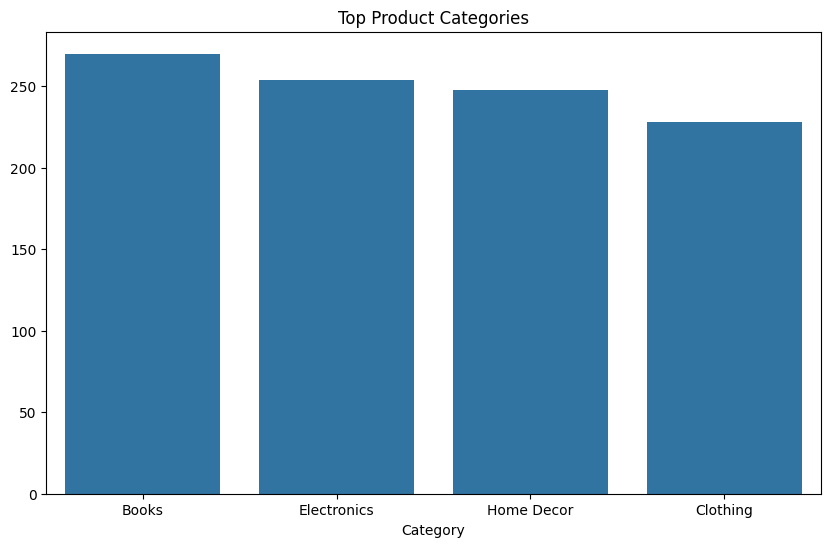

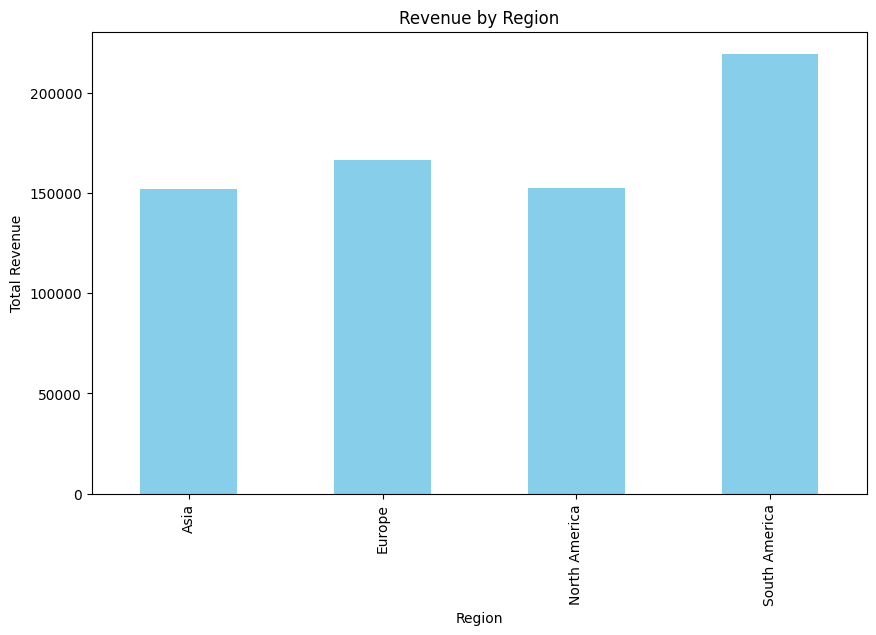

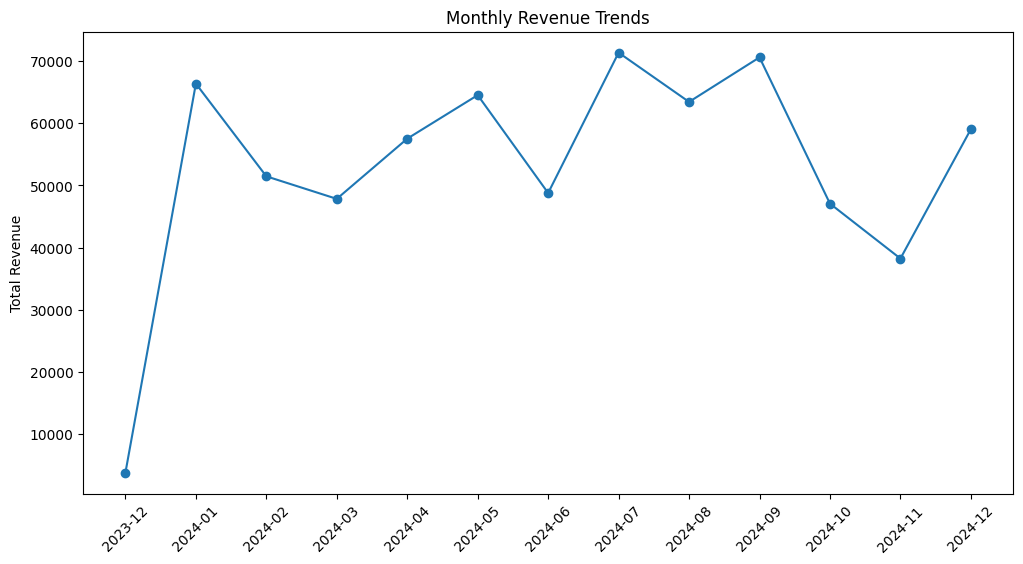

High-value Customers:
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


In [4]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

merged = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

# Summary statistics
print("Summary of Transactions:")
print(merged.describe())

# Top product categories
top_categories = merged['Category'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.title("Top Product Categories")
plt.show()

# Revenue by region
revenue_by_region = merged.groupby('Region')['TotalValue'].sum()
plt.figure(figsize=(10, 6))
revenue_by_region.plot(kind='bar', color='skyblue')
plt.title("Revenue by Region")
plt.ylabel("Total Revenue")
plt.show()

# Revenue trends over time
# Convert TransactionDate to datetime if not already done
merged['TransactionDate'] = pd.to_datetime(merged['TransactionDate'])

# Group by month and sum only the numeric columns
revenue_trends = merged.groupby(merged['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()

# Plot the revenue trends
plt.figure(figsize=(12, 6))
plt.plot(revenue_trends.index.astype(str), revenue_trends, marker='o')
plt.title("Monthly Revenue Trends")
plt.xticks(rotation=45)
plt.ylabel("Total Revenue")
plt.show()


# High-value customers
high_value_customers = merged.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
print("High-value Customers:")
print(high_value_customers)